# Sub-Problem 2: Are there particular locations in Seattle where AirBnb listings fetch higher prices?

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
sb.set()

In [13]:
df=pd.read_csv('data/new_data.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## DATA CLEANING

In [14]:
new_df = df[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
new_df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [15]:
# Replace NaN values with 0
new_df = new_df.fillna(0)

# Extract prices from new_df into priceDF
priceDF = new_df['price']

# Create an empty prices list
prices = []

# Convert prices from new_df into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',', ''))
    prices.append(p)

# Replace the price column in the new_df with the new prices
new_df['price'] = prices

# Remove listings with 0 for price
new_df = new_df[new_df.price > 0]

# Remove listings with invalid bedroom, bathroom, accommodates, beds, review score, and reviews per month
new_df = new_df[new_df.bedrooms > 0]
new_df = new_df[new_df.bathrooms > 0]
new_df = new_df[new_df.accommodates > 0]
new_df = new_df[new_df.beds > 0]
new_df = new_df[new_df.review_scores_rating > 0]
new_df = new_df[new_df.reviews_per_month > 0]

new_df.head()



,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

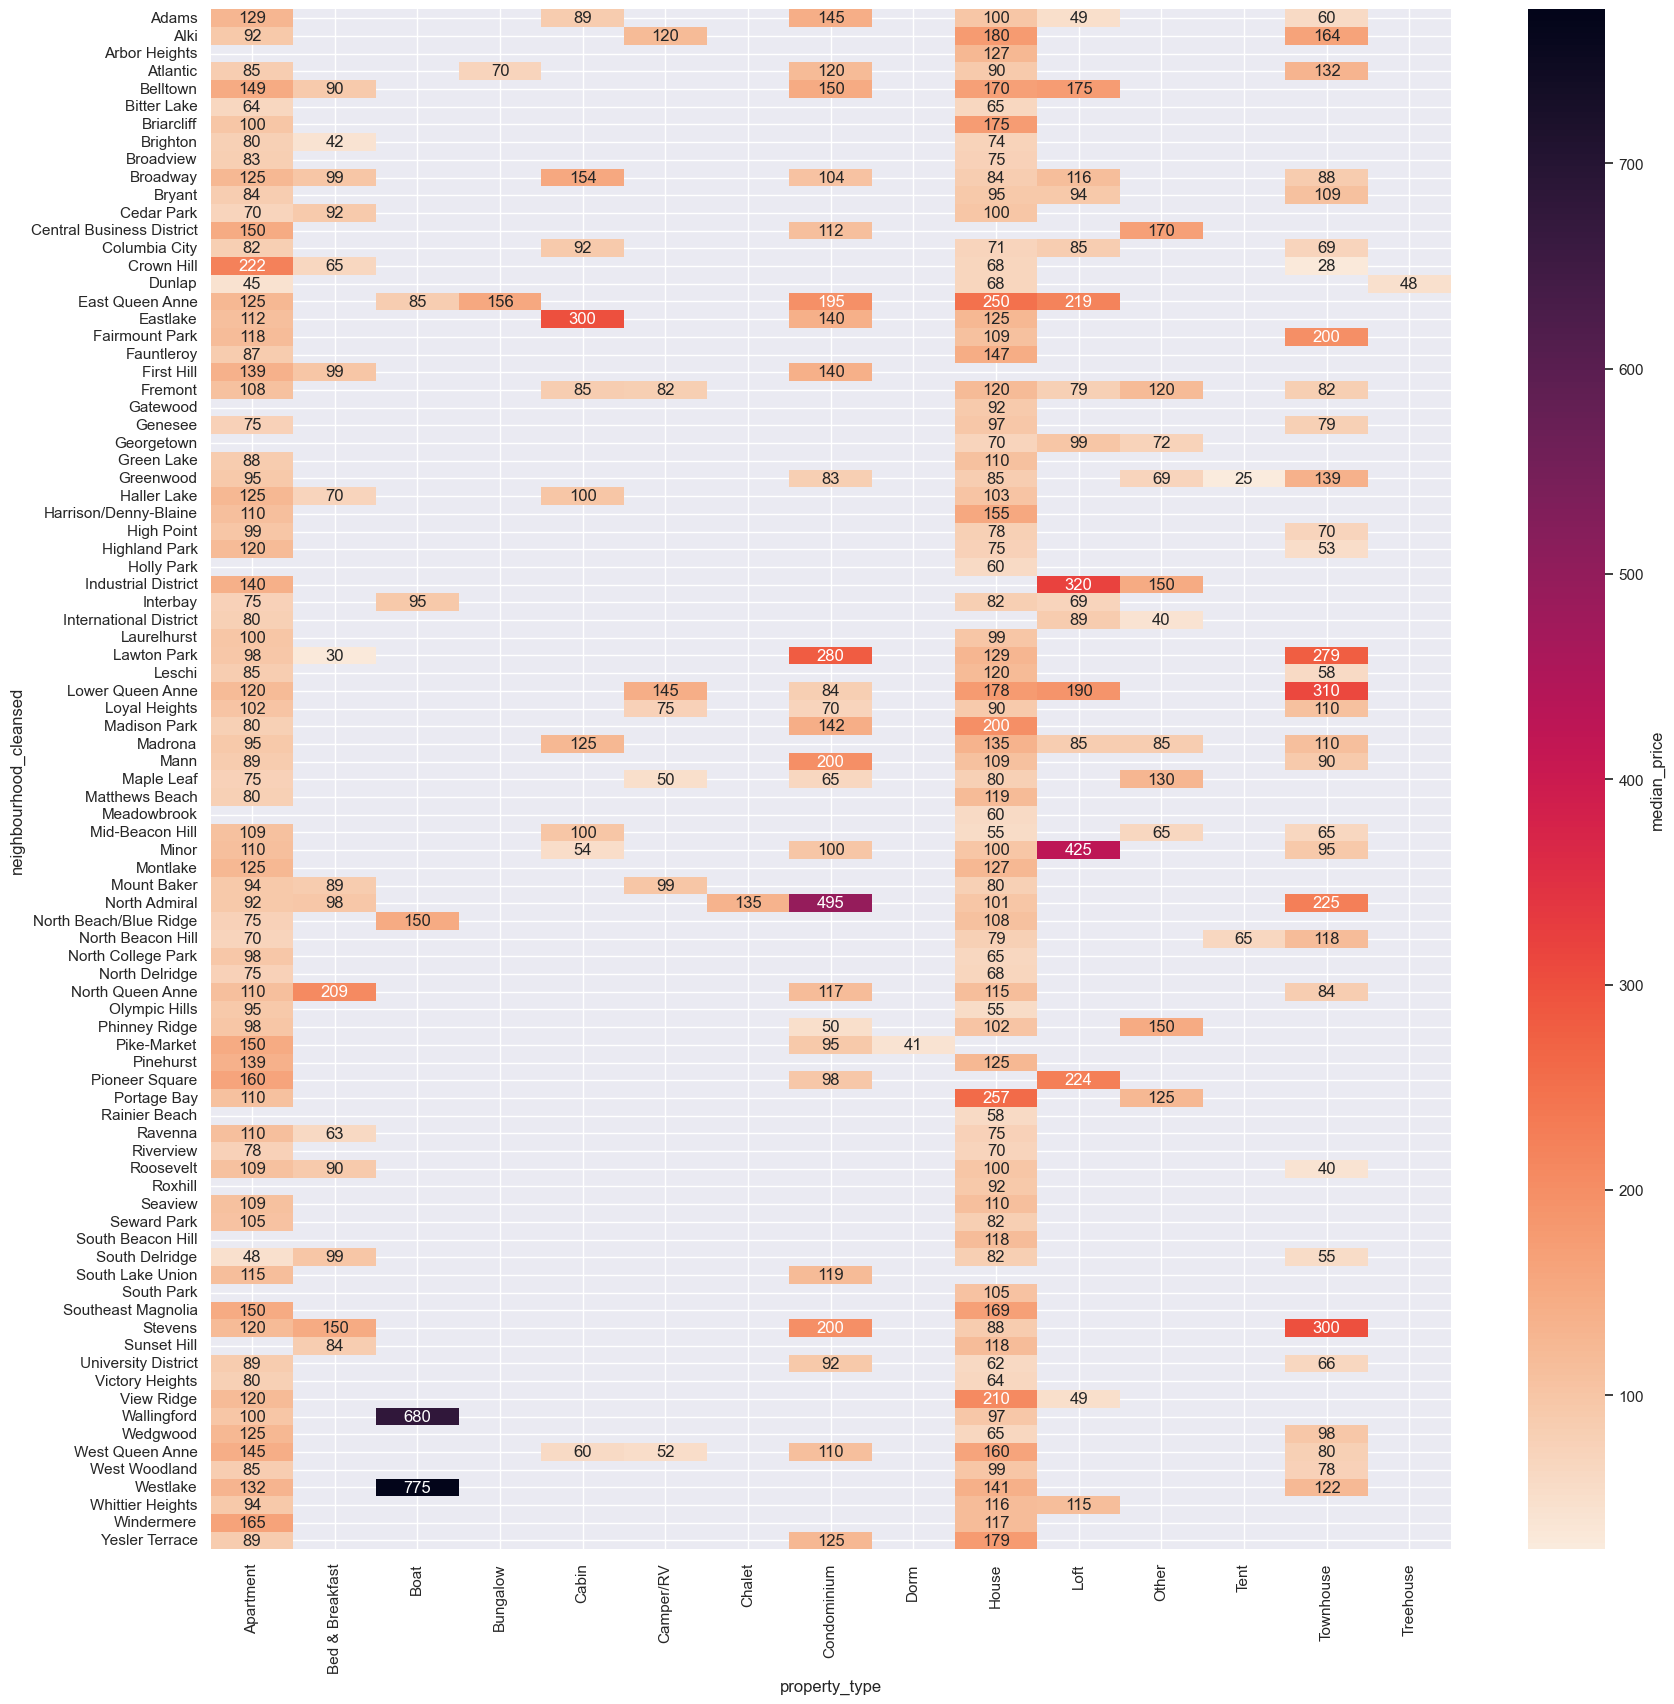

In [16]:
plt.figure(figsize=(20,20))
sb.heatmap(new_df.groupby([
    'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'median_price'})

### Analysing number of listings of each room type in the neighbourhoods

In [17]:
home = new_df[(new_df.room_type == 'Entire home/apt')]
private = new_df[(new_df.room_type == 'Private room')]
shared = new_df[(new_df.room_type == 'Shared room')]

location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

In [18]:
from bokeh.io import push_notebook, show, output_notebook
import os
from bokeh.plotting import gmap
from bokeh.models import GMapOptions, ColumnDataSource, Circle, BoxSelectTool

output_notebook()
map_options = GMapOptions(lat=47.605775, lng=-122.333163, map_type="roadmap", zoom=11)

'''
plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options,width=1200, height=750
)
'''
plot = gmap("", map_options, title="Seattle")

source = ColumnDataSource(
    data=dict(
        lat_home=location_home['latitude'],
        lon_home=location_home['longitude'],
        lat_private=location_private['latitude'],
        lon_private=location_private['longitude'],
        lat_shared=location_shared['latitude'],
        lon_shared=location_shared['longitude']
    )
)


circle_home = Circle(x="lon_home", y="lat_home", size=4, fill_color="yellow", fill_alpha=0.9, line_color=None)
circle_private =  Circle(x="lon_private", y="lat_private", size=4, fill_color="red", fill_alpha=0.9, line_color=None)
circle_shared =  Circle(x="lon_shared", y="lat_shared", size=4, fill_color="blue", fill_alpha=0.9, line_color=None)

plot.add_glyph(source, circle_home)
plot.add_glyph(source, circle_private)
plot.add_glyph(source, circle_shared)

plot.add_tools(BoxSelectTool())

Loading BokehJS ...

In [19]:
show(plot)